In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import PIL
import matplotlib.patches as mpatches

In [193]:
data_converged = data = pd.read_csv("poses-with-converge-100.csv")
data_not_converged = data = pd.read_csv("poses-without-converge-100.csv")

In [194]:
converged = data_converged[["px", "py"]]
nconverged = data_not_converged[["px", "py"]]

converged_len = np.linalg.norm(converged, axis=1, keepdims=True)
nconverged_len = np.linalg.norm(nconverged, axis=1, keepdims=True)

In [268]:
def plot(data, file_save):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
    ax.set_xlim(1.5,2.5)
    ax.set_ylim(-0.5,0.5)
    ax.scatter(data["px"], data["py"], alpha=0.3)
    ax.plot(np.array([2]), np.array([[0]]), 'rx')
    plt.savefig(file_save, transparent=True)

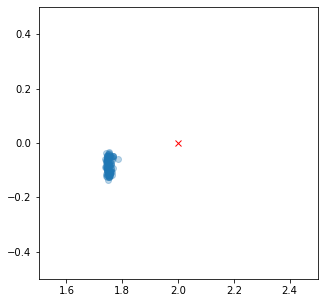

In [269]:
plot(converged, "poses_converged.png")

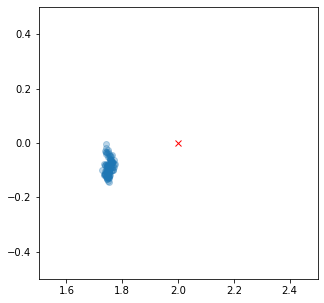

In [270]:
plot(nconverged, "poses_non_converged.png")

In [253]:
lens_converaged = np.linalg.norm(converged, axis=1, ord=1)
lens_nconveraged = np.linalg.norm(nconverged, axis=1, ord=1)

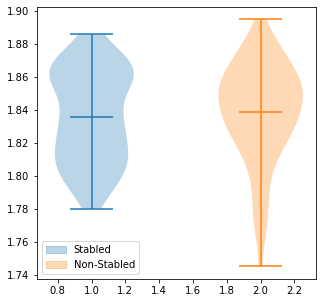

In [271]:
def plot_comparision():
    labels = []
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
    def add_label(violin, label):
        color = violin["bodies"][0].get_facecolor().flatten()
        labels.append((mpatches.Patch(color=color), label))
    add_label(ax.violinplot(lens_converaged, positions=[1], showmeans=True), "Stabled")
    add_label(ax.violinplot(lens_nconveraged, positions=[2], showmeans=True), "Non-Stabled")
    ax.legend(*zip(*labels), loc=3)
    plt.savefig("violin.png", transparent=True)
plot_comparision()